In [1]:
import numpy as np
import pandas as pd
import time
import scipy.io
# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'font.size': 22})

### Risk Neutral

In [2]:
## baseline from deterministic solution
name = 'Results_RN_twostage/RN_SOL_deterministic.pickle'
## load pickle file 
SOL_ = pickle.load( open( name, "rb" ) )
baseline = SOL_['OBJ']
print( 'DeterministIS Solution Objective: ', baseline)
baseline_inv = SOL_['In']

DeterministIS Solution Objective:  162.07010342405204


In [3]:
SOL_


{'X': {(1, 1, 0): 0.015108458264638861,
  (1, 2, 0): 0.015107060168786612,
  (1, 3, 0): 0.01510413121159347,
  (1, 4, 0): 0.01510073289558635,
  (1, 5, 0): 0.015097574306245545,
  (1, 6, 0): 0.015095432754435466,
  (1, 7, 0): 0.015092390144720944,
  (1, 8, 0): 0.015090330205358469,
  (1, 9, 0): 0.015089455708009139,
  (1, 10, 0): 0.015086062157282072,
  (1, 11, 0): 0.015084870982819838,
  (1, 12, 0): 0.0150831316642067,
  (1, 13, 0): 0.015061066588149851,
  (1, 14, 0): 0.015061066603230288,
  (1, 15, 0): 0.014976953677614452,
  (1, 16, 0): 0.015045274956793434,
  (1, 17, 0): 0.015030689607837946,
  (1, 18, 0): 0.015002880057013045,
  (1, 19, 0): 0.014980579221845697,
  (1, 20, 0): 0.014980579222680854,
  (1, 21, 0): 0.01496949161440211,
  (1, 22, 0): 0.014949567684122193,
  (1, 23, 0): 0.014934252471115607,
  (1, 24, 0): 0.014883599699624446,
  (1, 25, 0): 0.014803183994617594,
  (1, 26, 0): 0.014759230002021034,
  (1, 27, 0): 0.014758162218822547,
  (1, 28, 0): 0.014731569134317462,
 

In [4]:
# SOL_['In'].loc[1:]

In [5]:
counter =0
vals =[]
for i in range(1, len(SOL_['In'])):
    if SOL_['In'][i]>0:
        vals.append(SOL_['In'][i])
        counter+=1
print('-------For Deterministic case--------------')
# print(vals)
print('number of countries with non-zero inventory:',counter)
print('max relative inventory value', max(vals))
print('min relative inventory value', min(vals))
print('mean relative inventory value', np.mean(vals))
print('standard deviation relative inventory value', np.std(vals))

-------For Deterministic case--------------
number of countries with non-zero inventory: 83
max relative inventory value 0.0013234147416346833
min relative inventory value 4.3244106489776186e-05
mean relative inventory value 0.00046983504185755403
standard deviation relative inventory value 0.00040140960914745137


In [6]:
# Solutions
stimes = []
sols_ = []
scensol = []
mins =[]
maxes = []
means = []
sds = []
values = []
counts =[]
# nscen =[2,5,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
nscen = [2*i for i in range(1,24)]
for ii in nscen:
    name = 'Results_RN_twostage/RN_SOL_scen{}'.format(ii) +'.pickle'
    ## load pickle file 
    SOL_ = pickle.load( open( name, "rb" ) )
    sols_.append(SOL_['OBJ'])
    stimes.append(SOL_['STIME'])
    scensol.append(SOL_['SSOL'])
    counter =0
    vals =[]
    for i in range(1, len(SOL_['In'])):
        if SOL_['In'][i]>0:
            vals.append(SOL_['In'][i])
            counter+=1
    maxes.append(max(vals))
    mins.append(min(vals))
    means.append(np.mean(vals))
    sds.append(np.std(vals))
    values.append(vals)
    counts.append(counter)

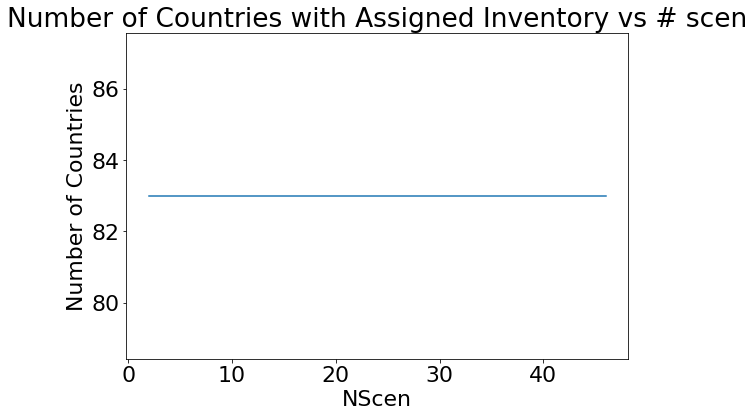

In [7]:
# Evo solving times vs nscens
plt.figure(figsize =(9,6))
plt.plot(nscen, counts)
plt.xlabel('NScen')
plt.ylabel('Number of Countries')
plt.title('Number of Countries with Assigned Inventory vs # scen');

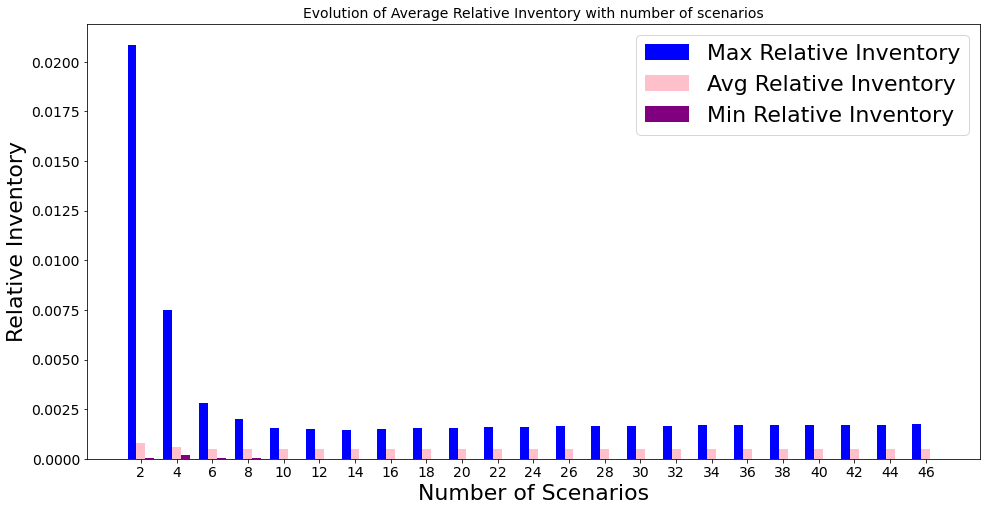

In [20]:
# # Evo solving times vs nscens
# plt.figure(figsize =(9,6))
# plt.bar(nscen, maxes)
# plt.xlabel('NScen')
# plt.ylabel('Solving time [s]')
# plt.title('Risk neutral solving time vs # scen')

X =nscen
max_ = maxes
min_ = mins
avg = means
  
X_axis = np.arange(len(X))

plt.figure(figsize=(16,8))
  
plt.bar(X_axis - 0.25, max_, 0.25, label = 'Max Relative Inventory', color= 'b')
plt.bar(X_axis + 0.0, avg, 0.25, label = 'Avg Relative Inventory',color ='pink')
plt.bar(X_axis + 0.25, min_, 0.25, label = 'Min Relative Inventory',color ='purple')
  
plt.xticks(X_axis, X, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Number of Scenarios")
plt.ylabel("Relative Inventory")
plt.title("Evolution of Average Relative Inventory with number of scenarios",fontsize=14)
plt.legend()
plt.show()

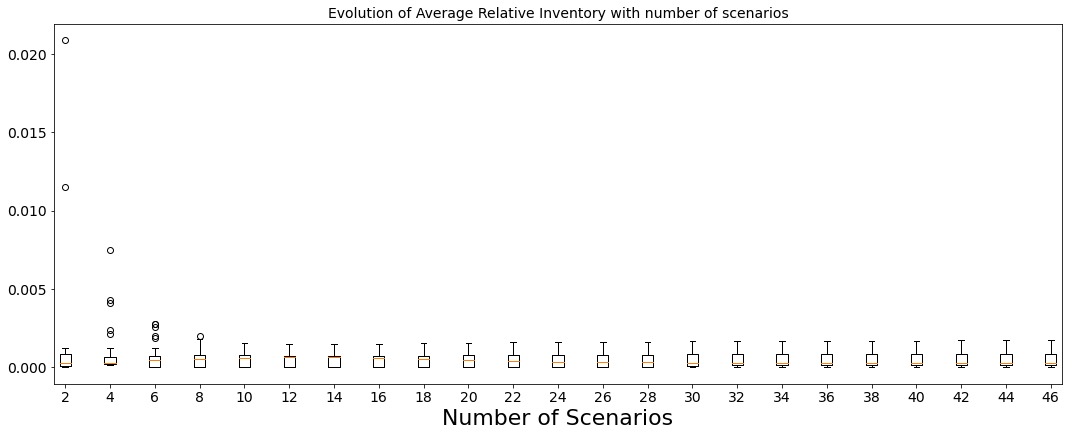

In [9]:

fig = plt.figure(figsize =(14, 5))
  
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
  
# Creating plot
bp = ax.boxplot(values,positions=[2*i for i in range(1,24)])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Number of Scenarios")
# plt.ylabel("Kg")
plt.title("Evolution of Average Relative Inventory with number of scenarios",fontsize=14)
plt.show()  

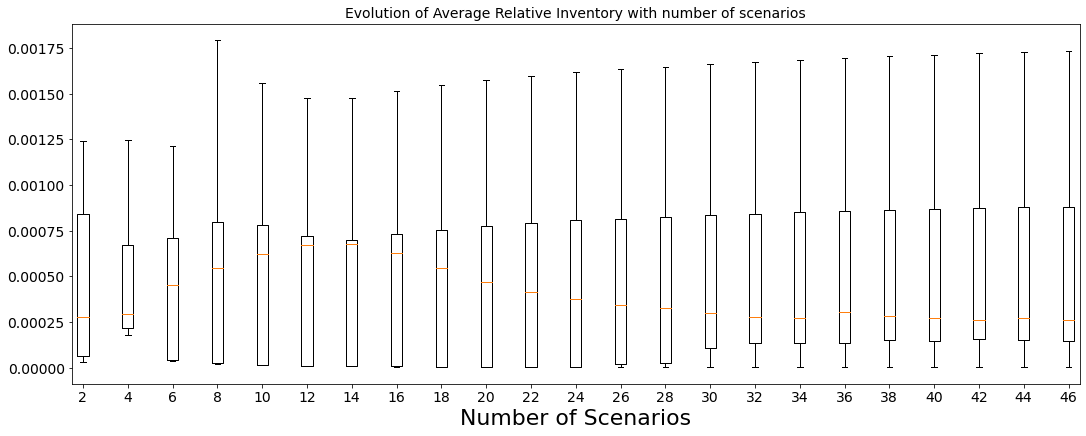

In [10]:

fig = plt.figure(figsize =(14, 5))
  
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
  
# Creating plot
bp = ax.boxplot(values, showfliers=False,positions=[2*i for i in range(1,24)])
plt.xticks( fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Number of Scenarios")
# plt.ylabel("Kg")
plt.title("Evolution of Average Relative Inventory with number of scenarios",fontsize=14)
plt.show() 

In [11]:
sols_

[1325.2293656534644,
 772.3197185900647,
 571.0755301804405,
 469.6246618075287,
 422.55179971070424,
 379.1368313816031,
 361.9812927397338,
 336.9911141864376,
 317.5546073630966,
 302.00552036962466,
 289.28282922394897,
 279.0428468920143,
 273.9774848935839,
 270.47575101368386,
 263.6126734658979,
 258.80176260935957,
 257.1360235442956,
 251.8541196620906,
 247.12552790266687,
 252.94583092121596,
 248.61835487379238,
 244.68217693080229,
 244.78474477078328]

In [12]:
scensol

[{0: 1839.659669405484, 1: 810.7990619014431},
 {0: 1840.094851245304,
  1: 810.8873505017895,
  2: 172.04411839469705,
  3: 266.2525542184974},
 {0: 1846.481343454054,
  1: 816.9941367140252,
  2: 162.06320250382532,
  3: 271.2091644260562,
  4: 162.0592025038281,
  5: 167.6461314810878},
 {0: 1846.481451338977,
  1: 816.9942445979594,
  2: 162.06329442902748,
  3: 271.2092669864703,
  4: 162.05929442903096,
  5: 167.6462241250325,
  6: 162.06729442902767,
  7: 168.47622412519667},
 {0: 1846.4815649530258,
  1: 816.9943567332766,
  2: 162.0633871256171,
  3: 271.2093705283925,
  4: 162.05938712562033,
  5: 167.64631643434188,
  6: 162.0673871256215,
  7: 168.47631643459758,
  8: 306.46252351925335,
  9: 162.05738712561958},
 {0: 1846.4816876414218,
  1: 816.9944743647904,
  2: 162.063480448439,
  3: 271.20947781938054,
  4: 162.05948044844266,
  5: 167.64641082698955,
  6: 162.06748044845105,
  7: 168.476410827054,
  8: 306.46263240690166,
  9: 162.05748044844495,
  10: 162.0644804484

In [13]:
# ## baseline from deterministic solution
# # baseline =  162.36
# deviation_percent = list(100*(np.array(sols) - baseline)/baseline)
# ## plot boxplot
# fig = plt.figure(figsize =(8, 5))
  
# # Creating axes instance
# ax = fig.add_axes([0, 0, 1, 1])
  
# # Creating plot
# bp = ax.barh([2*i for i in range(1,24)], deviation_percent)
# ax.set_ylabel('num_scenarios')
# ax.set_xlabel('percentage deviation of Objective from deterministic baseline');

In [14]:
# nscen

In [15]:
# [2*i for i in range(1,25)]

In [16]:
import statistics
sd_sols = []
for ii in range(len(nscen)):
    sd_sols.append(statistics.pstdev(scensol[ii].values()))
    
sd_sols

[514.4303037520204,
 662.960399871889,
 615.6834288164001,
 561.4080798888308,
 511.9075397911911,
 477.2827154844224,
 445.38258820740236,
 421.831184397357,
 401.48788819609206,
 383.73072857341054,
 368.07835211873453,
 354.04145111317666,
 340.847097146249,
 329.1205738282213,
 318.99912780252833,
 309.4920688773399,
 300.45039921881244,
 292.79636838409766,
 285.69038519944587,
 281.6759438490265,
 275.568030618758,
 269.8338855030955,
 264.49760004044253]

In [17]:
deviations = pd.DataFrame()
deviations['Scenarios'] = [2*i for i in range(1,24)]
deviations['Mean'] = sols_
deviations['Std'] = sd_sols
deviations['deviations'] = (deviations['Mean'] -baseline)/baseline
deviations
print( 'convergence deviation: ',100*(np.mean(sols_[-9:])-baseline)/baseline)

convergence deviation:  55.595302878331125


In [18]:
(244 - baseline)/baseline

0.5055213444368615

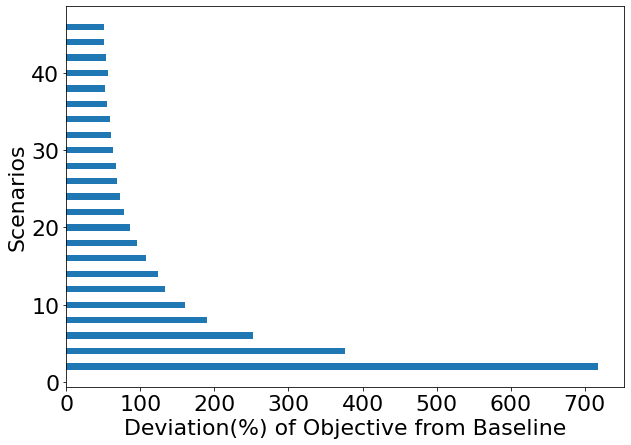

In [19]:
plt.figure(figsize =(10,7))
plt.barh(range(2,48,2), 100*deviations['deviations'])
plt.ylabel('Scenarios')
plt.xlabel('Deviation(%) of Objective from Baseline');

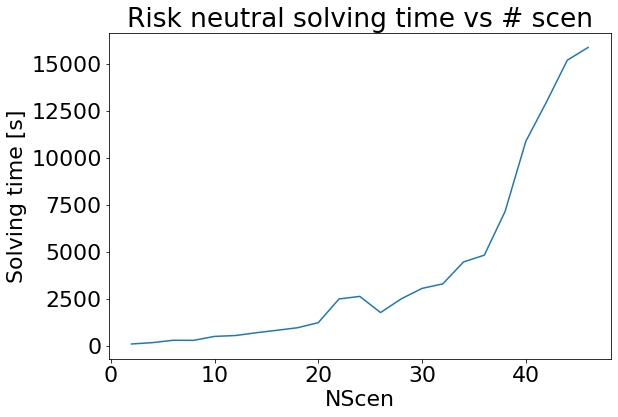

In [19]:
# Evo solving times vs nscens
plt.figure(figsize =(9,6))
plt.plot(nscen, stimes)
plt.xlabel('NScen')
plt.ylabel('Solving time [s]')
plt.title('Risk neutral solving time vs # scen')
plt.savefig('figures/Risk neutral solving time vs # scen.png')

In [20]:
# # Evo obj vs nscens
# plt.figure(figsize =(8,6))
# plt.scatter(nscen, sols, color='orange')
# # plt.ylim([150, 190])
# plt.xlabel('NScen')
# plt.ylabel('Expected Objective function')
# plt.title('Risk neutral expected obj evolution vs # scen')
# plt.savefig('figures/Risk neutral obj evolution vs # scen.png')

In [21]:
# M_new_vec = np.array(sols)
# Sigma_new_vec = np.array(sd_sols)

# lower_bound = M_new_vec - Sigma_new_vec
# upper_bound = M_new_vec + Sigma_new_vec

# plt.figure(figsize =(8,6))
# plt.plot(nscen, sols, color='k')
# plt.fill_between(nscen, lower_bound, upper_bound, alpha=.3)
# plt.xlabel('NScen')
# plt.ylabel('Expected Objective function')
# plt.title('Risk neutral expected obj evolution vs # scen')
# plt.savefig('figures/Risk neutral obj evolution vs # scen.png')

In [22]:
list(scensol[0].values())

[1839.659669405484, 810.7990619014431]

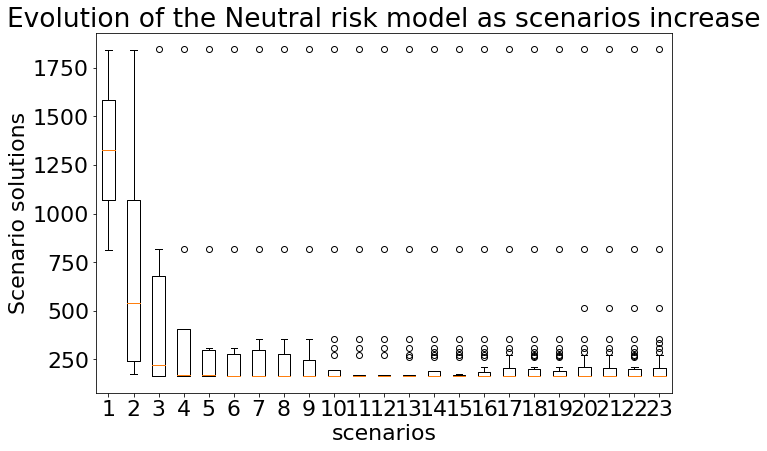

In [23]:
len(scensol)
slist =[]
for i in range(len(scensol)):
    slist.append(list(scensol[i].values()))

fig = plt.figure(figsize =(8, 5))
  
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
  
# Creating plot
bp = ax.boxplot(slist)

plt.xlabel('scenarios')
plt.ylabel('Scenario solutions')
plt.title('Evolution of the Neutral risk model as scenarios increase')
  
# show plot
plt.show()  

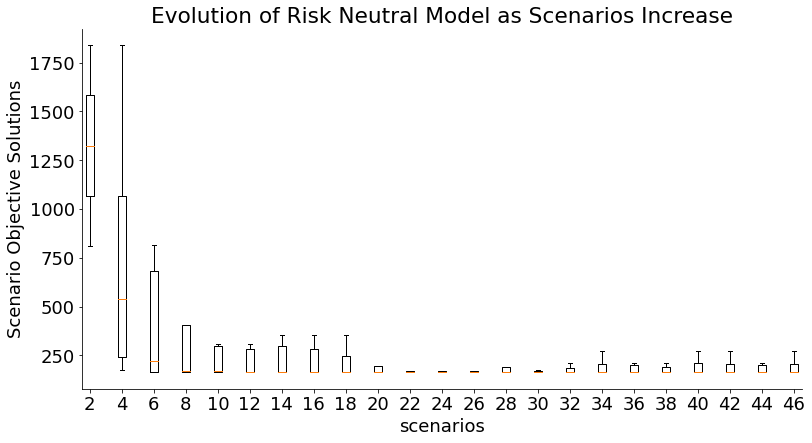

In [24]:
len(scensol)
slist =[]
for i in range(len(scensol)):
    slist.append(list(scensol[i].values()))
    
slist

fig = plt.figure(figsize =(10, 5))
plt.rcParams.update({'font.size': 18})
  
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
  
# Creating plot
bp = ax.boxplot(slist, showfliers=False,positions=[2*i for i in range(1,24)])

plt.xlabel('scenarios')
plt.ylabel('Scenario Objective Solutions')
plt.title('Evolution of Risk Neutral Model as Scenarios Increase')
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
  
# show plot
plt.show()   

## Sensitivity Analysis: Gamma and zeta

In [40]:
import matplotlib as mpl

mpl.rcParams['axes.linewidth'] = 1.5 #set the value globally

In [41]:
sols = []
# scensol = []
capacities = [0.75,0.8,0.9,1]
for cap in capacities :
    name = 'Results_RN_twostage/individual_scens/RN_gamma_scen{}'.format(cap) +'.pickle'
    ## load pickle file 
    SOL_ = pickle.load( open( name, "rb" ) )
    sols.append(SOL_['OBJ'])
    stimes.append(SOL_['STIME'])
#     scensol.append(SOL_['SSOL'])
sols

[782.7408293641475, 777.2176204071434, 764.7014338604123, 747.0199098504654]

(740.0, 800.0)

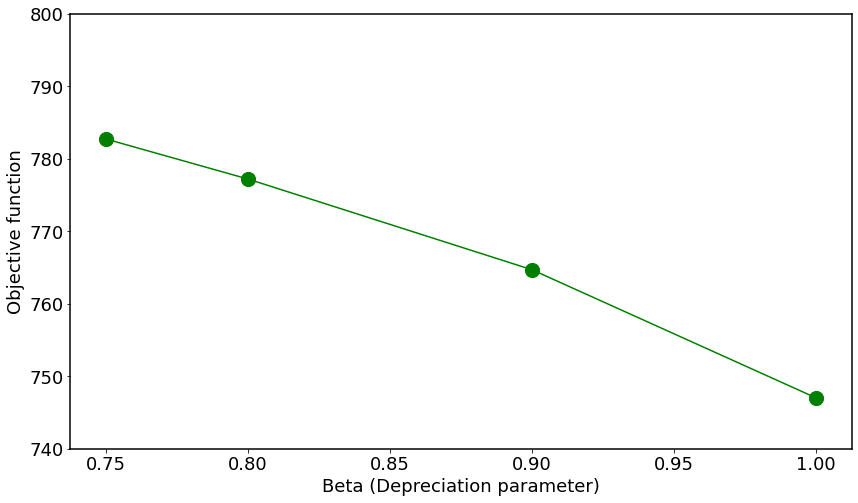

In [43]:
# Evo of solns for different gamma calues
plt.figure(figsize=(14,8))
plt.scatter(capacities, sols, color='green', s =200)
plt.plot(capacities, sols, color='green')
# plt.ylim([150, 190])
plt.xlabel('Beta (Depreciation parameter)')
plt.ylabel('Objective function')
plt.ylim((740,800))
# plt.title('Evo of Objective  for different beta values using top 5 scenarios');

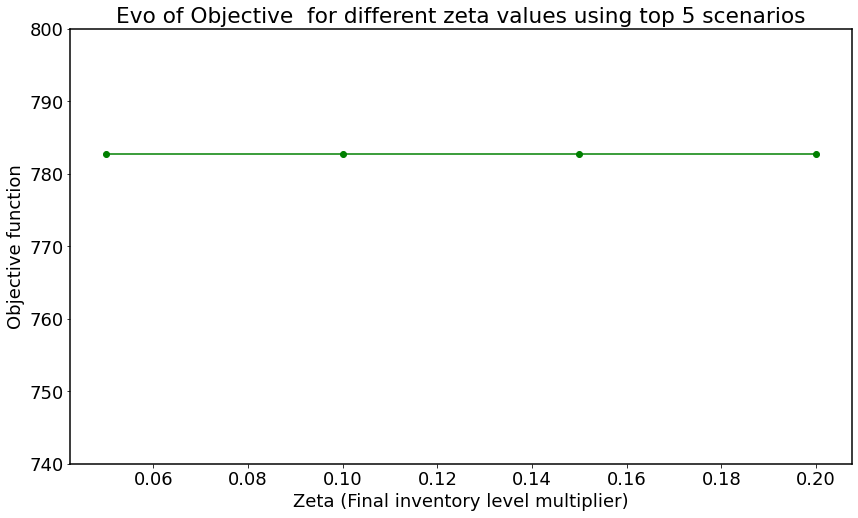

In [28]:
sols = []
# scensol = []
capacities = [0.05,0.1,0.15,0.2]
for cap in capacities :
    name = 'Results_RN_twostage/individual_scens/RN_zeta_scen{}'.format(cap) +'.pickle'
    ## load pickle file 
    SOL_ = pickle.load( open( name, "rb" ) )
    sols.append(SOL_['OBJ'])
    stimes.append(SOL_['STIME'])
    
    
# Evo of solns for different gamma calues
plt.figure(figsize=(14,8))
plt.scatter(capacities, sols, color='green')
plt.plot(capacities, sols, color='green')
# plt.ylim([150, 190])
plt.xlabel('Zeta (Final inventory level multiplier)')
plt.ylabel('Objective function')
plt.ylim((740,800))
plt.title('Evo of Objective  for different zeta values using top 5 scenarios');

## Individual Scenarios

In [29]:
## baseline from deterministic solution
name = 'Results_RN_twostage/RN_SOL_deterministic.pickle'
## load pickle file 
SOL_ = pickle.load( open( name, "rb" ) )
baseline = SOL_['OBJ']
baseline_inv = SOL_['In']

name_= "../stochastic/scens_two_stage/country_index_key.p"
name_dict= pickle.load( open( name_, "rb" ) )
name_dict

{1: 'Brazil',
 2: 'Colombia',
 3: 'Indonesia',
 4: 'Germany',
 5: 'Guatemala',
 6: 'Honduras',
 7: 'Peru',
 8: 'India',
 9: 'Italy',
 10: 'Ethiopia',
 11: 'Uganda',
 12: 'Mexico',
 13: 'Belgium',
 14: 'Costa Rica',
 15: "Côte d'Ivoire",
 16: 'Nicaragua',
 17: 'El Salvador',
 18: 'United States',
 19: 'Papua New Guinea',
 20: 'Kenya',
 21: 'Netherlands',
 22: 'Switzerland',
 23: 'Tanzania',
 24: 'Cameroon',
 25: 'France',
 26: 'Poland',
 27: 'Canada',
 28: 'Spain',
 29: 'China',
 30: 'Slovenia',
 31: 'Austria',
 32: 'Ecuador',
 33: 'Sweden',
 34: 'United Kingdom',
 35: 'Burundi',
 36: 'Rwanda',
 37: 'Thailand',
 38: 'Laos',
 39: 'Togo',
 40: 'Guinea',
 41: 'Czech Republic',
 42: 'Portugal',
 43: 'Madagascar',
 44: 'Finland',
 45: 'Denmark',
 46: 'Dominican Republic',
 47: 'Panama',
 48: 'Bulgaria',
 49: 'Rep. Congo',
 50: 'Ireland',
 51: 'Malaysia',
 52: 'South Africa',
 53: 'Yemen',
 54: 'Bolivia',
 55: 'Hungary',
 56: 'Slovakia',
 57: 'Russia',
 58: 'Singapore',
 59: 'Luxembourg',
 60

In [74]:
## create table of 
inventory = []
objective = []
avg_inv = []
names = []
for ii in range(1,30):
    # for ii in scens:
    name ='Results_RN_twostage/individual_scens/RN_det_scen{}'.format(ii) +'.pickle'
    SOL_ = pickle.load( open( name, "rb" ) )
    inv = SOL_['In']
    obj = SOL_['OBJ']
    inventory.append(inv[ii]) #[ii]
    objective.append(obj)
    names.append(name_dict[ii])
#     print(inventory,objective, names)
    tot =0
    for j in range(30):
        if j!= ii:
            tot+=inv[j]
    avg_inv.append(tot/30)

In [76]:
DF = pd.DataFrame()
DF['Country']=names
DF['Obj'] = objective
DF['Country Inventory'] = inventory
DF['avg_inv_change_top30'] = avg_inv
DF
DF.to_csv('appendix2.csv')

C:\Users\mmoud\AppData\Local\Temp/ipykernel_19560/3414086036.py:29: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(0, 100);


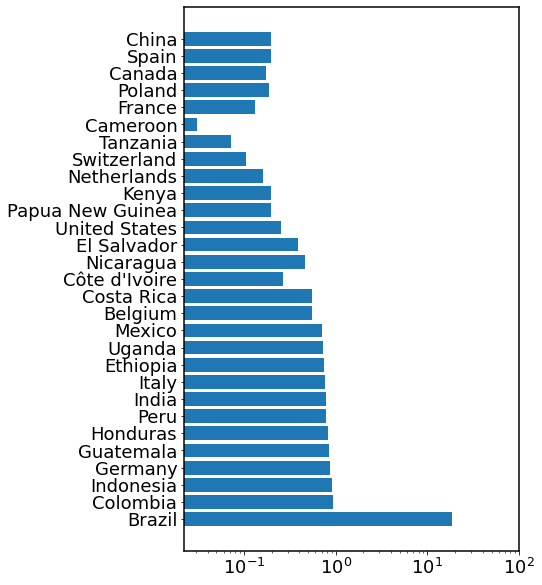

In [30]:
## Brazil
ii = 1
# for ii in scens:
name ='Results_RN_twostage/individual_scens/RN_det_scen{}'.format(ii) +'.pickle'
SOL_ = pickle.load( open( name, "rb" ) )
brazil_inv = SOL_['In']
brazil_inv 

ix_list=[]
inv_diff = []
name_list = []
for i in range(1,30):
    diff = abs(brazil_inv[i]-baseline_inv[i])
    val = (diff/(baseline_inv[i]+10e-6))
#     if (diff <=10e-4) or diff>=-10e-4:
    ix_list.append(i)
    inv_diff.append(val)
    name_list.append(name_dict[i])
    
# Create a fig, ax objects
fig, ax = plt.subplots(figsize=(6, 10))

ax.set_xscale('log')

names = name_list.copy()
# plt.figure(figsize =(6,10))
ax.barh(ix_list, inv_diff)
ax.set_yticks(ix_list,names)
ax.set_xlim(0, 100);

# len(inv_diff)
# inv_diff

C:\Users\mmoud\AppData\Local\Temp/ipykernel_19560/96490162.py:27: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(0, 100);


[0.3490829681336438,
 24.1754456475841,
 0.34155554284052875,
 0.3340730913256351,
 0.3265355316169671,
 0.3216868391819095,
 0.31476300606732865,
 0.3110292758266889,
 0.30590262211816555,
 0.3009754376367463,
 0.29896915955345504,
 0.2944238587880158,
 0.24643757382328701,
 0.24643757210726192,
 0.12530368441265805,
 0.2157785975930784,
 0.18587556027901797,
 0.13120011892447667,
 0.10137746158463058,
 0.1013774553233364,
 0.08510035448685623,
 0.057083973485428,
 0.0384194542231654,
 -0.02301955280344613,
 -0.08525372209853668,
 -0.1259297099160466,
 -0.11531054057843566,
 -0.13099853238751702,
 -0.13099852784873647]

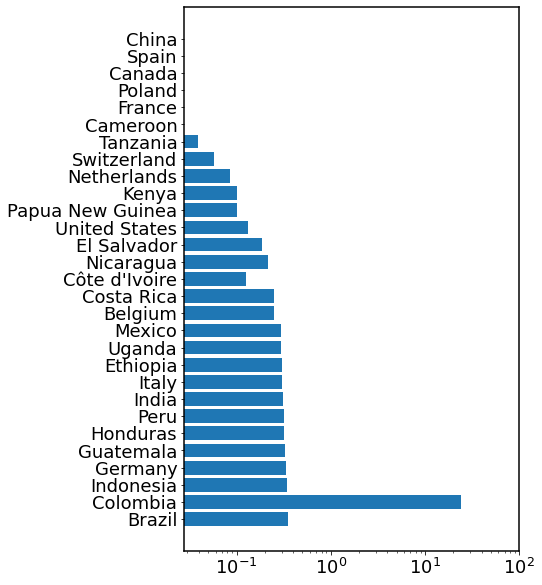

In [31]:
## Colombia
ii = 2
# for ii in scens:
name ='Results_RN_twostage/individual_scens/RN_det_scen{}'.format(ii) +'.pickle'
SOL_ = pickle.load( open( name, "rb" ) )
col_inv = SOL_['In']

ix_list=[]
inv_diff = []
name_list = []
for i in range(1,30):
    diff = (col_inv[i]-baseline_inv[i])
    val = (diff/(baseline_inv[i]+10e-6))
    ix_list.append(i)
    inv_diff.append(val)
    name_list.append(name_dict[i])

# Create a fig, ax objects
fig, ax = plt.subplots(figsize=(6, 10))

ax.set_xscale('log')

names = name_list.copy()
# plt.figure(figsize =(6,10))
ax.barh(ix_list, inv_diff)
ax.set_yticks(ix_list,names)
ax.set_xlim(0, 100);
inv_diff

C:\Users\mmoud\AppData\Local\Temp/ipykernel_19560/46290261.py:21: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(-0.5, 100);


[-0.39271541774449137,
 -0.3923530127416348,
 -0.39172268051965337,
 -0.3906282581646248,
 -0.38935628312915405,
 -0.3886751071468077,
 -0.3876993566819876,
 -0.3876667132862255,
 -0.3853035349290592,
 -0.38607699857403655,
 -0.3861769402967646,
 -0.3851977034353107,
 -0.37850840597071206,
 -0.37850840594753365,
 -0.4453789527159025,
 -0.37553189579562113,
 -0.36915137577883983,
 -0.34822866991790047,
 -0.3536423752202795,
 -0.35364237528210374,
 -0.35023977397798056,
 -0.33045176610220484,
 -0.33957464450445485,
 12.945960084114368,
 -0.3029029778308174,
 -0.3077031857623729,
 -0.29157452667481065,
 -0.285190723796806,
 -0.28519072371823695]

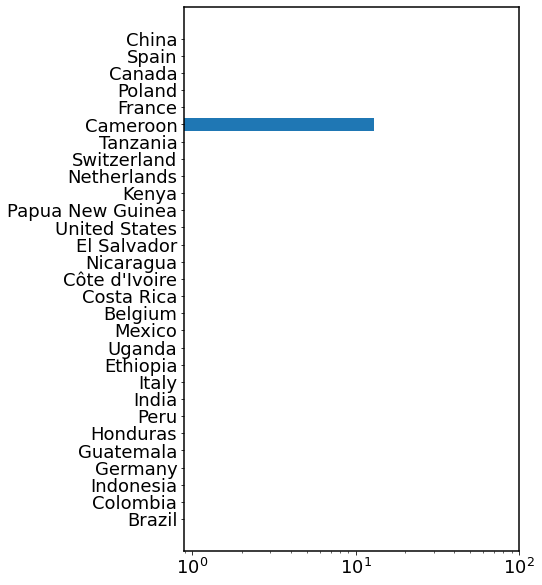

In [32]:
## Cameroon
ii = 24
# for ii in scens:
name ='Results_RN_twostage/individual_scens/RN_det_scen{}'.format(ii) +'.pickle'
SOL_ = pickle.load( open( name, "rb" ) )
cmr_inv = SOL_['In']

ix_list=[]
inv_diff = []
name_list = []
for i in range(1,30):
    diff = (cmr_inv[i]-baseline_inv[i])
    val = (diff/(baseline_inv[i]+10e-6))
    ix_list.append(i)
    inv_diff.append(val)
    name_list.append(name_dict[i])
# Create a fig, ax objects
fig, ax = plt.subplots(figsize=(6, 10))

ax.set_xscale('log')
ax.set_xlim(-0.5, 100);

names = name_list.copy()
# plt.figure(figsize =(6,10))
ax.barh(ix_list, inv_diff)
ax.set_yticks(ix_list,names)

# len(inv_diff)
inv_diff


## Deterministic scenario: Statistics

In [33]:
## baseline from deterministic solution
name = 'Results_RN_twostage/RN_SOL_deterministic.pickle'
## load pickle file 
SOL_ = pickle.load( open( name, "rb" ) )
baseline = SOL_['OBJ']
baseline_inv = SOL_['In']

name_= "../stochastic/scens_two_stage/country_index_key.p"
country_key= pickle.load( open( name_, "rb" ) )
country_key[0]= 'Loss demand'
# country_key



In [34]:
## Analysis for second stage flow
sol_dict= SOL_['X']
sol_dict
keys = list(sol_dict.keys())
in_k = []
out_k =[]
val =[]

## store relevant values
for key in keys:

    in_k.append(country_key[key[0]])
    out_k.append(country_key[key[1]])
    val.append(sol_dict[key])
    
## create dataframe with flows in second stage values
df_ = pd.DataFrame()
df_['in_k'] = in_k
df_['out_k'] = out_k
df_['val'] =val
df_.head(60)

,in_k,out_k,val
0,Brazil,Brazil,0.015108
1,Brazil,Colombia,0.015107
2,Brazil,Indonesia,0.015104
3,Brazil,Germany,0.015101
4,Brazil,Guatemala,0.015098
5,Brazil,Honduras,0.015095
6,Brazil,Peru,0.015092
7,Brazil,India,0.015090
8,Brazil,Italy,0.015089
9,Brazil,Ethiopia,0.015086


In [35]:
# ## Find number of suppliers for top importers
# display(df_.groupby('out_k').count().sort_values(by='in_k',ascending=False))

# ## Find number of importers for top importer
# display(df_.groupby('in_k').count().sort_values(by='out_k',ascending=False))

In [36]:
## extract allocation fractions
nodes = pd.read_csv('../nodes.csv')
temp =pd.merge(nodes[['Country','Demand']],df_,left_on ='Country', right_on='in_k',how = 'outer')
nodes
## total normalized flow = fraction allocation times demand
temp['norm_flow'] = temp['Demand']*temp['val']

tem = temp.groupby('out_k').sum().sort_values(by ='norm_flow',ascending =False)

tem

# supply allocated to meet demand by countries
tot_supply  = tem['norm_flow'].sum()

## percentage demand captured by each country

tem['perc_sup'] =100*tem['norm_flow']/tot_supply

tem_1= tem.sort_values(by='perc_sup', ascending = False).head(60)

print('Top 3 suppliers fraction allocated supply: ', tem_1.head(3).perc_sup.sum())

# print('fraction of demand absorbed by nodes:' ,tem_1.Demand['Brazil']/sum(tem_1.Demand))
tem_1


Top 3 suppliers fraction allocated supply:  44.81485081306324


,Demand,val,norm_flow,perc_sup
out_k,,,,
Brazil,3.694087,4.114083,0.989599,26.737341
Colombia,3.694087,3.223339,0.419524,11.334853
Indonesia,3.694087,2.826109,0.249558,6.742657
Germany,3.694087,2.619537,0.187590,5.068368
Guatemala,3.694087,2.495647,0.157613,4.258435
Honduras,3.694087,2.430162,0.143627,3.880563
Peru,3.694087,2.353141,0.128645,3.475790
India,3.694087,2.308658,0.120659,3.260015
Italy,3.694087,2.291242,0.117657,3.178908


In [37]:
### find average number of suppliers and customers 
temp.groupby('in_k').count()

,Country,Demand,out_k,val,norm_flow
in_k,,,,,
Afghanistan,1,1,1,1,1
Albania,83,83,83,83,83
Algeria,1,1,1,1,1
Andorra,1,1,1,1,1
Angola,83,83,83,83,83
...,...,...,...,...,...
Venezuela,1,1,1,1,1
Yemen,1,1,1,1,1
Zambia,1,1,1,1,1


In [38]:
sol_dict= SOL_['X']
keys = list(sol_dict.keys())
in_k = []
out_k =[]
val =[]

## store relevant values
for key in keys:
    in_k.append(key[0])
    out_k.append(key[1])
    val.append(sol_dict[key])
    
## create dataframe with values
df = pd.DataFrame()
# df['countries'] = ['buffer'] + list(country_key.values())
df['in_k'] = in_k
df['out_k'] = out_k
df['val'] =val
df
df.groupby([in_k]).size().describe()    

count    182.000000
mean      37.494505
std       40.864112
min        1.000000
25%        1.000000
50%        1.000000
75%       83.000000
max       83.000000
dtype: float64